In [2]:
from google.colab import drive

import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

FILE_PATH = "/content/drive/MyDrive/BT4012 Group 16!!/" # change the file path accordingly

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

# MAIN FUNCTION TO EVALUATE MULTIPLE MODEL CSV FILES
def evaluate_model_predictions(csv_files, y_true, model_names=None, threshold=0.5):
    # csv_files: list of csv paths
    # y_true is the ground truth labels
    # model_names: optional list of readable names

    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(csv_files))]

    results = {}
    roc_data = {}
    pr_data = {}
    cm_data = {}

    for csv, name in zip(csv_files, model_names):
        print(f"\n============ Evaluating {name} ============\n")

        df = pd.read_csv(csv)
        y_prob = df["fraudulent"].values
        y_pred = (y_prob >= threshold).astype(int)

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_prob)
        pr_auc = average_precision_score(y_true, y_prob)
        cm = confusion_matrix(y_true, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc": roc_auc,
            "pr_auc": pr_auc,
            "confusion_matrix": cm
        }

        # store curve data
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        prec_curve, rec_curve, _ = precision_recall_curve(y_true, y_prob)

        roc_data[name] = (fpr, tpr)
        pr_data[name] = (prec_curve, rec_curve)
        cm_data[name] = cm

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}")
        print("Confusion Matrix:\n", cm)

    # After computing all, generate visualisations
    plot_roc_curves(roc_data)
    plot_pr_curves(pr_data)
    plot_confusion_matrices(cm_data)

    return results


# VISUALISATIONS
def plot_roc_curves(roc_data):
    plt.figure(figsize=(8,6))
    for name, (fpr, tpr) in roc_data.items():
        plt.plot(fpr, tpr, label=name)

    plt.plot([0,1], [0,1], 'k--', alpha=0.6)
    plt.title("ROC Curves — Model Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_pr_curves(pr_data):
    plt.figure(figsize=(8,6))
    for name, (prec, rec) in pr_data.items():
        plt.plot(rec, prec, label=name)

    plt.title("Precision–Recall Curves — Model Comparison")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_confusion_matrices(cm_data):
    n = len(cm_data)
    cols = 2
    rows = (n + 1) // 2

    plt.figure(figsize=(12, 5 * rows))

    for i, (name, cm) in enumerate(cm_data.items(), 1):
        plt.subplot(rows, cols, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix — {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

    plt.tight_layout()
    plt.show()




============ Evaluating base ============

Accuracy: 0.9916
Precision: 0.9735
Recall: 0.8497
F1-score: 0.9074
ROC-AUC: 0.9928
PR-AUC: 0.9529
Confusion Matrix:
 [[3399    4]
 [  26  147]]

============ Evaluating roberta ============

Accuracy: 0.9891
Precision: 0.9718
Recall: 0.7977
F1-score: 0.8762
ROC-AUC: 0.9882
PR-AUC: 0.9327
Confusion Matrix:
 [[3399    4]
 [  35  138]]

============ Evaluating distilbert ============

Accuracy: 0.9888
Precision: 0.9404
Recall: 0.8208
F1-score: 0.8765
ROC-AUC: 0.9919
PR-AUC: 0.9360
Confusion Matrix:
 [[3394    9]
 [  31  142]]


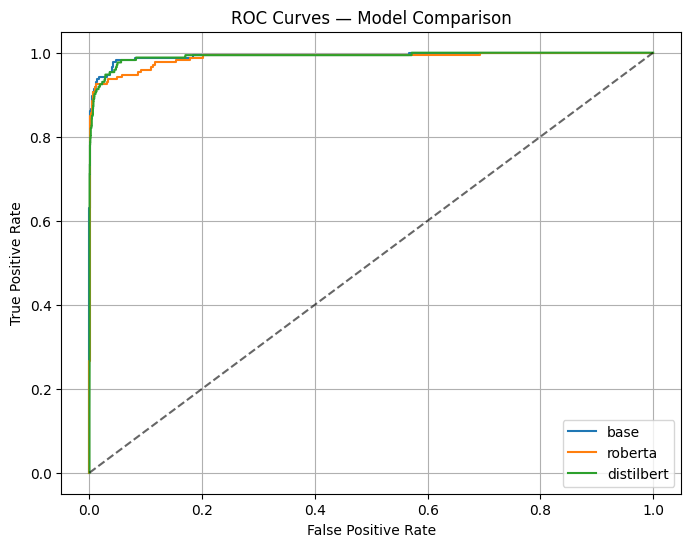

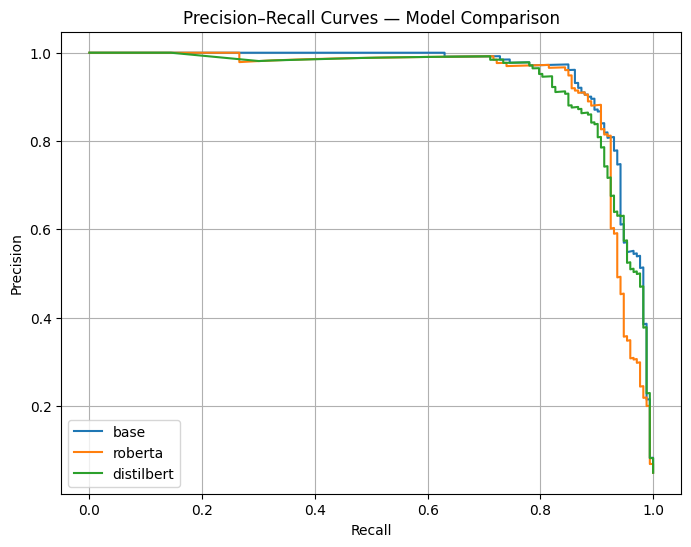

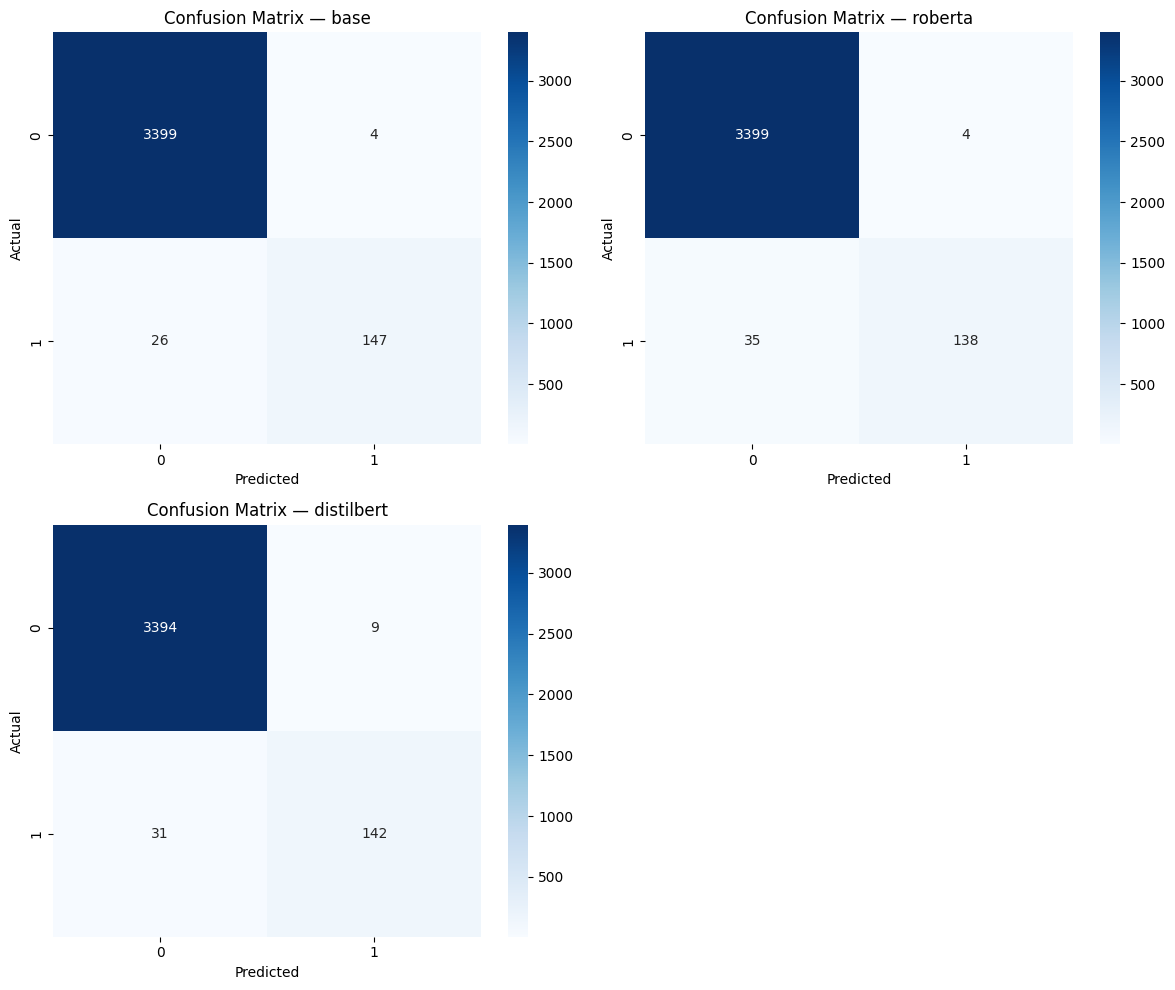

In [4]:
csv_files = [
   "/content/drive/MyDrive/BT4012 Group 16!!/submission_bert-base-uncased_5fold.csv",
   "/content/drive/MyDrive/BT4012 Group 16!!/submission_roberta-base_5fold_bs16.csv",
   "/content/drive/MyDrive/BT4012 Group 16!!/submission_distilbert-base-uncased_5fold.csv",
]

model_names = ["base","roberta","distilbert"]

test_df = pd.read_csv(f"/content/drive/MyDrive/BT4012 Group 16!!/test_df.csv", keep_default_na=True)
y_true = test_df["fraudulent"].values

results = evaluate_model_predictions(csv_files, y_true=y_true, model_names=model_names)
